In [1]:
import networkx as nx
import numpy, scipy
import matplotlib.pyplot as plt

## finite difference Poisson equation solution

0:  |F(x)| = 2.10149; step 1
1:  |F(x)| = 0.121146; step 1
2:  |F(x)| = 0.00233057; step 1
3:  |F(x)| = 1.82227e-07; step 1
Residual: 1.82227e-07


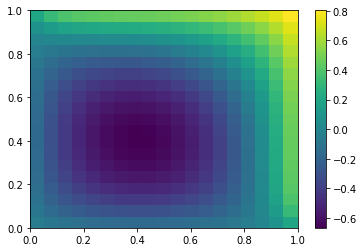

In [101]:
%matplotlib inline
from scipy.optimize import newton_krylov
from numpy import cosh, zeros_like, mgrid, zeros

# parameters
numx, numy = 20, 20
hx, hy = 1./(numx-1), 1./(numy-1)

P_left, P_right = 0, 1
P_top, P_bottom = 1, 0

def residual(P):
    d2x = zeros_like(P)
    d2y = zeros_like(P)

    d2x[1:-1] = (P[2:]   - 2*P[1:-1] + P[:-2]) / hx/hx
    d2x[0]    = (P[1]    - 2*P[0]    + P_left)/hx/hx
    d2x[-1]   = (P_right - 2*P[-1]   + P[-2])/hx/hx

    d2y[:,1:-1] = (P[:,2:] - 2*P[:,1:-1] + P[:,:-2])/hy/hy
    d2y[:,0]    = (P[:,1]  - 2*P[:,0]    + P_bottom)/hy/hy
    d2y[:,-1]   = (P_top   - 2*P[:,-1]   + P[:,-2])/hy/hy

    return d2x + d2y - 10*cosh(P).mean()**2

# solve
guess = zeros((numx, numy), float)
sol = newton_krylov(residual, guess, method='lgmres', verbose=1)
print('Residual: %g' % abs(residual(sol)).max())

# visualize
import matplotlib.pyplot as plt
x, y = mgrid[0:1:(numx*1j), 0:1:(numy*1j)]
plt.pcolor(x, y, sol)
plt.colorbar()
plt.show()

## fine nx graph

In [102]:
g = nx.Graph()

# add the nodes
for e in zip(x,y):
    for i in range(len(e[0])):
        g.add_node((e[0][i],e[1][i]),pos=(float(e[0][i]),float(e[1][i])))

# add edges parallel to x hat
for e in zip(x,y):
    for i in range(len(e[0])-1):
        xLeft, yLeft = e[0][i], e[1][i]
        xRight, yRight = e[0][i+1], e[1][i+1]
        g.add_edge((xLeft,yLeft),(xRight,yRight))

# add edges parallel to y hat
for e in zip(x.T,y.T):
    for i in range(len(e[0])-1):
        xLeft, yLeft = e[0][i], e[1][i]
        xRight, yRight = e[0][i+1], e[1][i+1]
        g.add_edge((xLeft,yLeft),(xRight,yRight))

## plot it

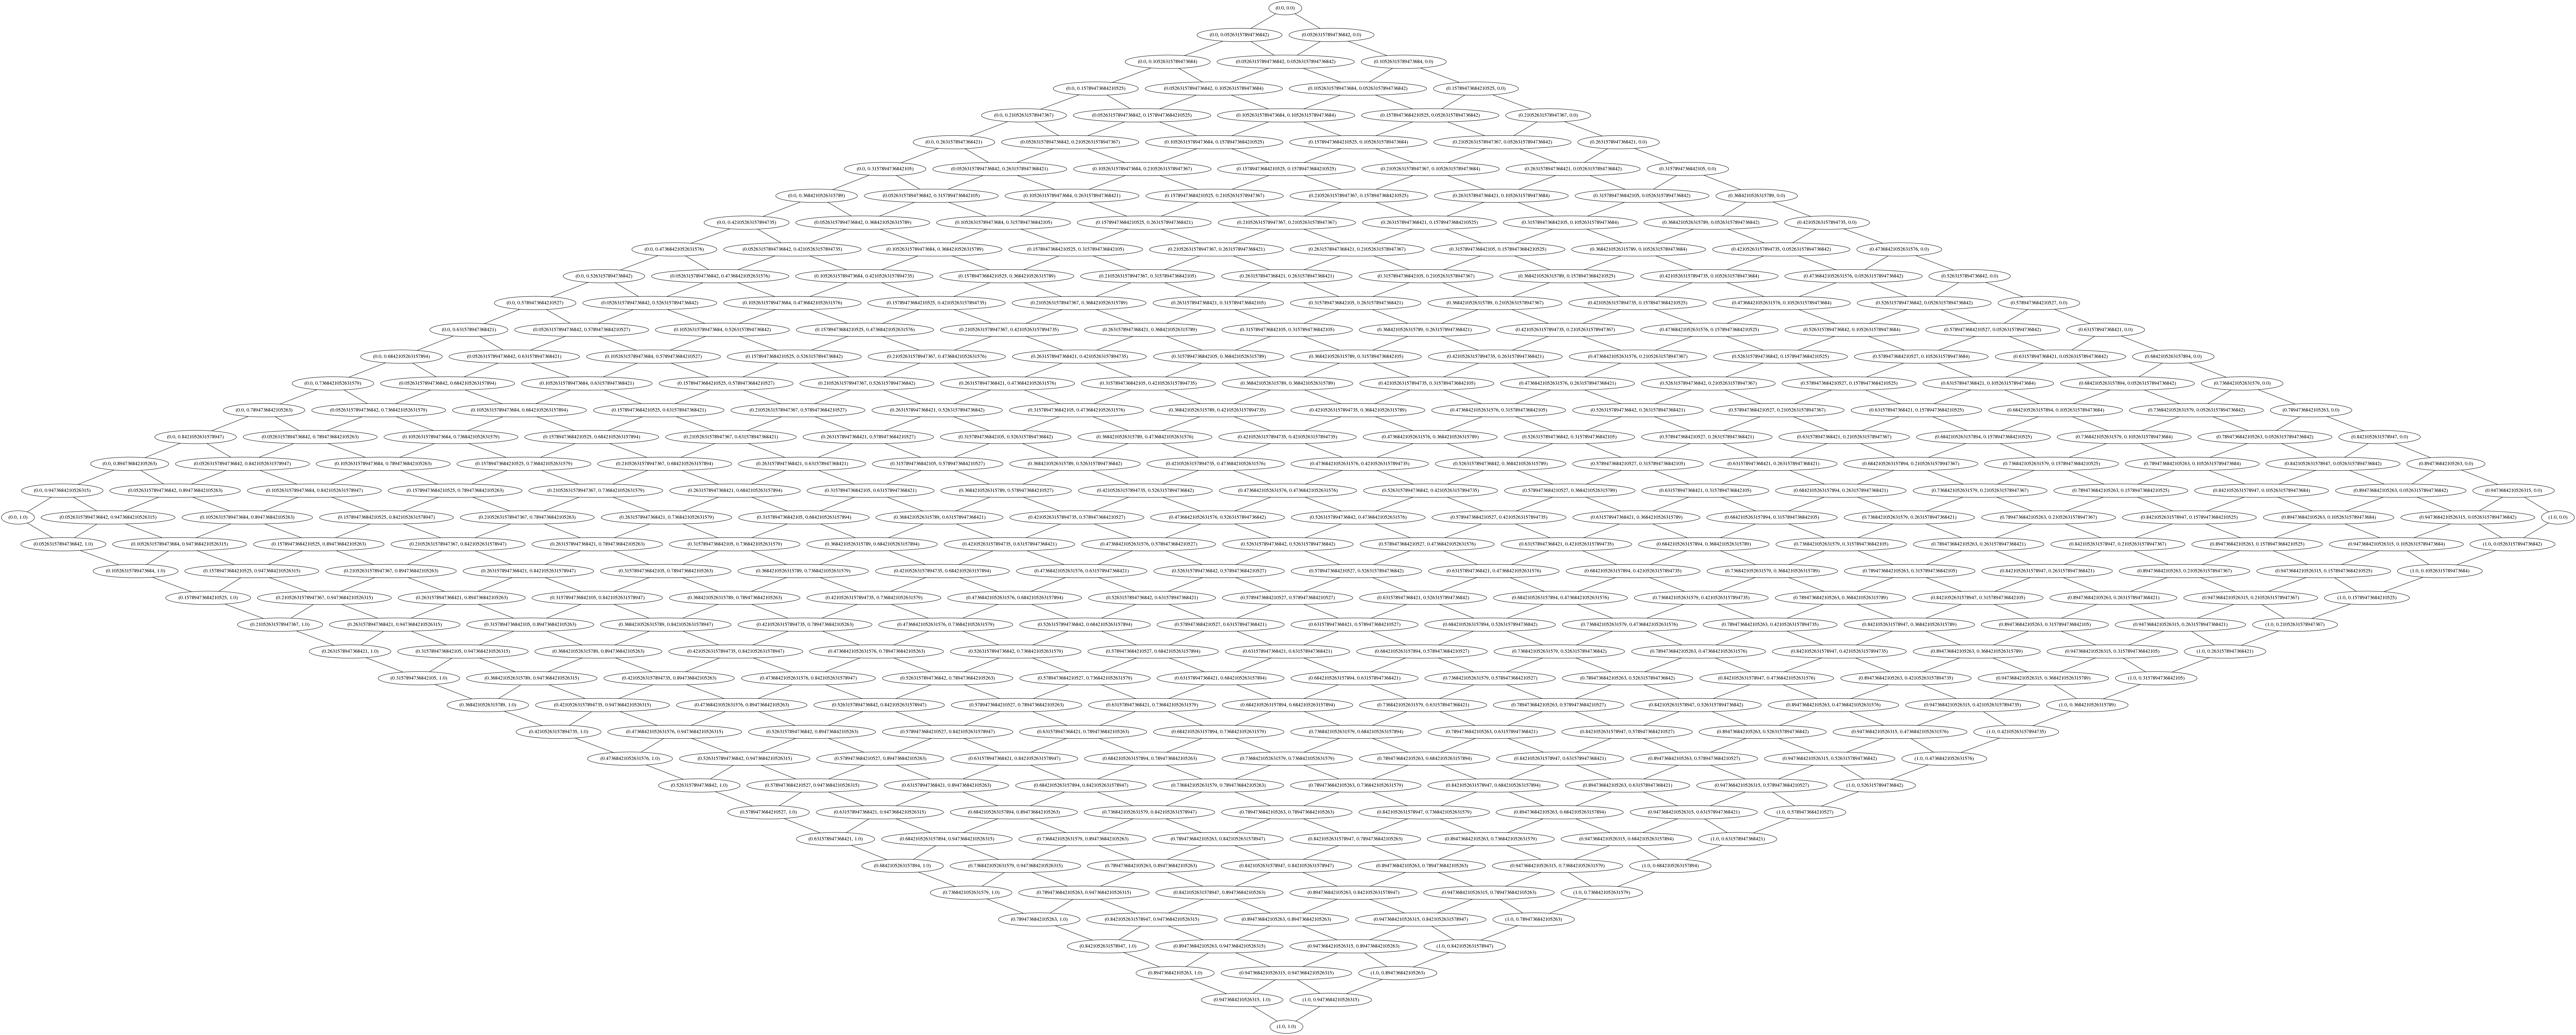

In [103]:
from IPython.display import Image
img = nx.drawing.nx_pydot.to_pydot(g)
Image(img.create_png())

In [100]:
from graphviz import Source
s = Source(exec(str(nx.drawing.nx_pydot.graphviz_layout(g,prog='dot'))),\
           filename="test.gv", format="png")
s.view()

Error: test.gv: syntax error in line 1 near 'None'


CalledProcessError: Command '['dot', '-Tpng', '-O', 'test.gv']' returned non-zero exit status 1. [stderr: b"Error: test.gv: syntax error in line 1 near 'None'\n"]

In [106]:
nx.drawing.nx_pydot.write_dot(g,'./test')
s = Source('./test',\
           filename="test.gv", format="png")
s.view()

Error: test.gv: syntax error in line 1 near '.'


CalledProcessError: Command '['dot', '-Tpng', '-O', 'test.gv']' returned non-zero exit status 1. [stderr: b"Error: test.gv: syntax error in line 1 near '.'\n"]